# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape

(112915, 11)

------------
## Drop na

In [3]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
data.dropna(inplace=True)
data.shape

(108648, 11)

---------
## Create X and y

In [5]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [6]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [7]:
## your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape,X_test.shape

((76053, 10), (32595, 10))

In [8]:
#对数据进行尺度压缩
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
#check
X_train_norm.max(axis=0),X_train_norm.min(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [9]:
## your code here
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, max_iter=100, random_state=0)
lr.fit(X_train_norm, y_train)

LogisticRegression(random_state=0)

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [10]:
## your code here
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtree.fit(X_train_norm, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [11]:
## your code here
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_norm, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=1)

### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [61]:
## your code here
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=0.01, random_state=0,probability=True)
svm.fit(X_train_norm, y_train)

SVC(C=0.01, probability=True, random_state=0)

### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [14]:
## your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_norm, y_train)


KNeighborsClassifier()

---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [15]:
## your code here
#用lr对y进行预测
y_pred_lr = lr.predict(X_test_norm)

from sklearn.metrics import accuracy_score
#打印预测结果
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr))

Accuracy: 0.93


In [16]:
## your code here
#用dtree对y进行预测
y_pred_dtree = dtree.predict(X_test_norm)

#打印预测结果
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_dtree))

Accuracy: 0.94


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [17]:
## your code here
#用forest对y进行预测
y_pred_forest = dtree.predict(X_test_norm)

#打印预测结果
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_forest))

Accuracy: 0.94


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [57]:
## your code here
#用forest对y进行预测
y_pred_svm = dtree.predict(X_test_norm)

#打印预测结果
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_svm))

Accuracy: 0.94


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [19]:
## your code here
#用forest对y进行预测
y_pred_knn = dtree.predict(X_test_norm)

#打印预测结果
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_knn))

Accuracy: 0.94


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [20]:
y_test.shape
lr.predict_proba(X_test_norm).T[0]

array([0.96244217, 0.97461655, 0.93948096, ..., 0.95524566, 0.92983416,
       0.87764359])

In [21]:
## your code here
from sklearn.metrics import roc_auc_score,precision_score,\
                            accuracy_score,recall_score


# 封装一个呈现分类模型评估指标的函数
def classification_scores(modelname, model, x_test, y_test):
    #获取预测概率估计，对于0,1分类，获取对第2个分类的概率（pos）
    y_score = model.predict_proba(x_test).T[1]
    y_pred = model.predict(x_test)
    #获取各个评价指标得分
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label = 1)
    prec  = precision_score(y_test, y_pred, pos_label = 1)
    roc_auc = roc_auc_score(y_test,y_score)
    print(f"{modelname} scores:\n"
            f"Accuracy:\t{acc}\n"
            f"Recall:\t\t{recall}\n"
            f"Precision:\t{prec}\n"
            f"AUCofROC:\t{roc_auc}\n")

In [22]:
# 获取逻辑回归的指标  
classification_scores(modelname = 'Logisistic Regression',
                      model = lr,
                      x_test = X_test_norm,
                      y_test = y_test)

Logisistic Regression scores:
Accuracy:	0.9334560515416475
Recall:		0.009212344541685858
Precision:	0.5263157894736842
AUCofROC:	0.6828245095601391



In [23]:
# 获取决策树的指标  
classification_scores(modelname = 'Decision Tree',
                      model = dtree,
                      x_test = X_test_norm,
                      y_test = y_test)

Decision Tree scores:
Accuracy:	0.9356649792913023
Recall:		0.14647627821280515
Precision:	0.5658362989323843
AUCofROC:	0.8103993801470463



In [24]:
# 获取随机森林的指标  
classification_scores(modelname = 'Random_Forest',
                      model = forest,
                      x_test = X_test_norm,
                      y_test = y_test)

Random_Forest scores:
Accuracy:	0.9329958582604694
Recall:		0.1432519576232151
Precision:	0.48976377952755906
AUCofROC:	0.7558593951077194



In [62]:
# 获取SVM的指标  
classification_scores(modelname = 'SVM',
                      model = svm,
                      x_test = X_test_norm,
                      y_test = y_test)

SVM scores:
Accuracy:	0.9333946924374904
Recall:		0.0
Precision:	0.0
AUCofROC:	0.6169794858794719



C:\Users\zzl96\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# 获取KNN的指标  
classification_scores(modelname = 'K-Nearest Neighbors',
                      model = knn,
                      x_test = X_test_norm,
                      y_test = y_test)

K-Nearest Neighbors scores:
Accuracy:	0.9323822672188986
Recall:		0.04053431598341778
Precision:	0.42105263157894735
AUCofROC:	0.6113367961582852



### 评价：由于样本中target和非target不平衡，所以recall和precision都相对偏低

## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

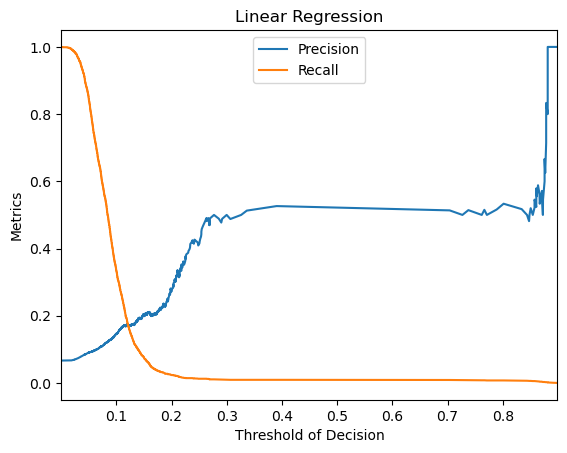

In [48]:
## your code here
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# 封装一个获取不同阈值下recall和precision并绘图的方法
def precrec_under_thrds(modelname,model,x_test,y_test):
    #参考练习4的做法
    y_score = model.predict_proba(x_test).T[1]
    y_pred = model.predict(x_test)
    #分别获取
    precs,recs,thrds = precision_recall_curve(y_true=y_test,probas_pred=y_score)
    _,ax = plt.subplots()
    ax.plot(thrds,precs[1:],linestyle='-',label="Precision")
    ax.plot(thrds,recs[1:],linestyle ='-',label="Recall")
    ax.set_xlim([min(thrds),max(thrds)])
    ax.set_xlabel('Threshold of Decision')
    ax.set_ylabel('Metrics')
    ax.set_title(modelname)
    ax.legend(loc='best')

#根据逻辑回归作precision和recall对threshold变化的响应
precrec_under_thrds('Linear Regression',lr,X_test_norm,y_test)

### 对LR，阈值由0.5变为0.3，recall（即检出有问题的敏感性）没有明显变化

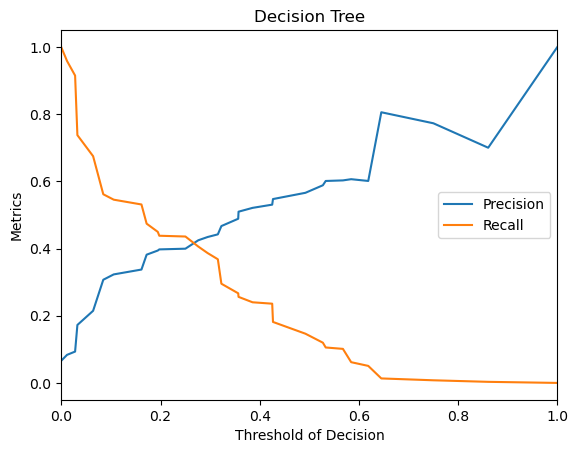

In [52]:
# case:决策树
precrec_under_thrds('Decision Tree',dtree,X_test_norm,y_test)

### 对决策树，阈值由0.5变为0.3，recall会明显上升

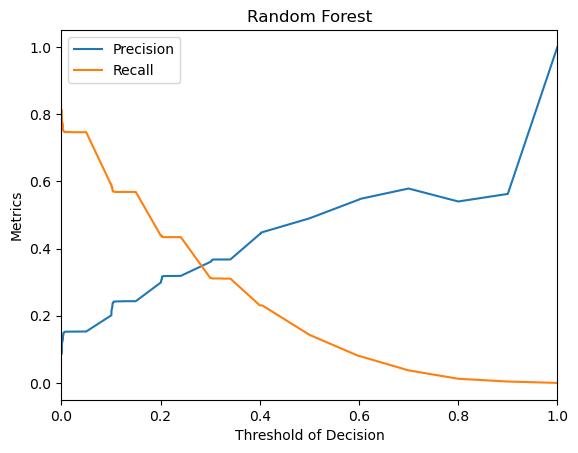

In [53]:
# case:随机森林
precrec_under_thrds('Random Forest',forest,X_test_norm,y_test)

### 对随机森林，阈值由0.5变为0.3，recall会上升

In [ ]:
# case:SVM
precrec_under_thrds('SVM',svm,X_test_norm,y_test)

### 对SVM，阈值由0.5变为0.3，recall在很大范围都很低，说明模型不适用于检出欺诈

In [ ]:
# case:KNN
precrec_under_thrds('K Nearest Neighbors',knn,X_test_norm,y_test)

### 对KNN，阈值由0.5变为0.3，recall变化不大，而且最高的recall也只有0.4，所以KNN不适合用于检出target